In [1]:
import os
import struct
import numpy as np

In [4]:
def load_mnist(path, kind='train'):
    labels_path = os.path.join(path, '%s-labels.idx1-ubyte' % kind)
    images_path = os.path.join(path, '%s-images.idx3-ubyte' % kind)

    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II', lbpath.read(8))
        labels = np.fromfile(lbpath, dtype=np.uint8)
    
    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack(">IIII", imgpath.read(16))
        images = np.fromfile(imgpath, dtype=np.uint8).reshape(len(labels), 784)
        
    return images, labels

In [5]:
X_train, y_train = load_mnist('mnist', 'train')

In [6]:
X_test, y_test = load_mnist('mnist', 't10k')

In [10]:
import matplotlib.pyplot as plt

In [11]:
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)

In [12]:
ax = ax.flatten()

In [14]:
for i in range(10):
    img = X_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')


In [16]:
ax[0].set_xticks([])

[]

In [17]:
ax[0].set_yticks([])

[]

In [18]:
plt.tight_layout()

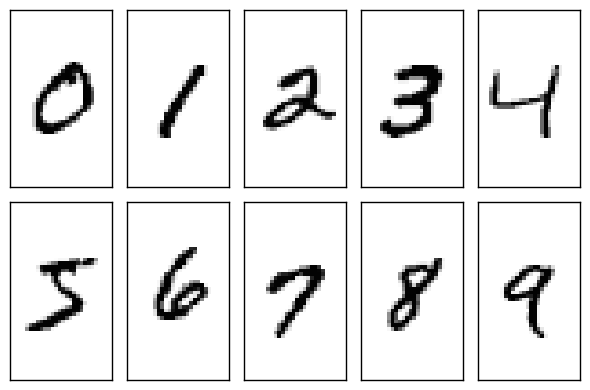

In [19]:
plt.show()

In [27]:
from neuralnet import NeuralNetMLP

In [28]:
nn = NeuralNetMLP(n_output=10,
                 n_features=X_train.shape[1],
                 n_hidden=50,
                 l2=0.1,
                 l1=0.0,
                 epochs=1000,
                 eta=0.001,
                 alpha=0.001,
                 decrease_const=0.00001,
                 shuffle=True,
                 minibatches=50,
                 random_state=1)

In [29]:
nn.fit(X_train, y_train, print_progress=True)

Epoch: 1000/1000

In [30]:
plt.plot(range(len(nn.cost_)), nn.cost_)

In [31]:
plt.ylim([0, 2000])

(0, 2000)

In [32]:
plt.ylabel('Cost')

In [33]:
plt.xlabel('Epochs * 50')

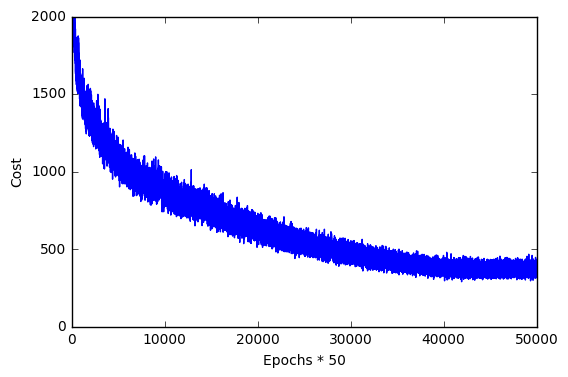

In [34]:
plt.show()

In [35]:
batches = np.array_split(range(len(nn.cost_)), 1000)

In [36]:
cost_ary = np.array(nn.cost_)

In [37]:
cost_avgs = [np.mean(cost_ary[i]) for i in batches]

In [38]:
plt.plot(range(len(cost_avgs)), cost_avgs, color='red')

In [39]:
plt.ylim([0, 2000])

(0, 2000)

In [40]:
plt.ylabel('Cost')

In [42]:
plt.xlabel('Epochs')

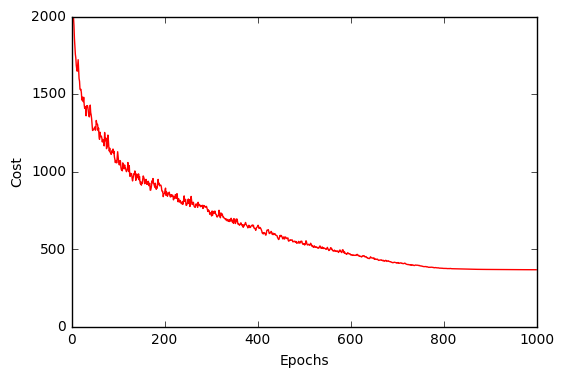

In [43]:
plt.show()

In [44]:
y_train_pred = nn.predict(X_train)

In [45]:
acc = np.sum(y_train == y_train_pred, axis=0) / X_train.shape[0]

In [46]:
acc

0.97718333333333329

In [47]:
y_test_pred = nn.predict(X_test)

In [48]:
acc = np.sum(y_test == y_test_pred, axis=0) / X_test.shape[0]

In [49]:
acc

0.95709999999999995

In [50]:
miscl_img = X_test[y_test != y_test_pred][:25]

In [51]:
correct_lab = y_test[y_test != y_test_pred][:25]

In [52]:
miscl_lab = y_test_pred[y_test != y_test_pred][:25]

In [53]:
fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True)

In [54]:
ax = ax.flatten()

In [56]:
for i in range(25):
    img = miscl_img[i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title('%d) t: %d p: %d' % (i+1, correct_lab[i], miscl_lab[i]))

In [57]:
ax[0].set_xticks([])

[]

In [58]:
ax[0].set_yticks([])

[]

In [59]:
plt.tight_layout()

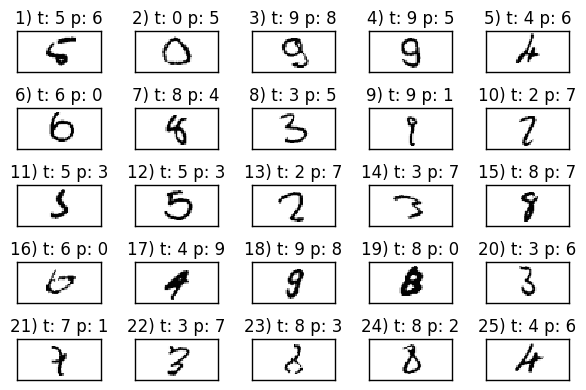

In [60]:
plt.show()